In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


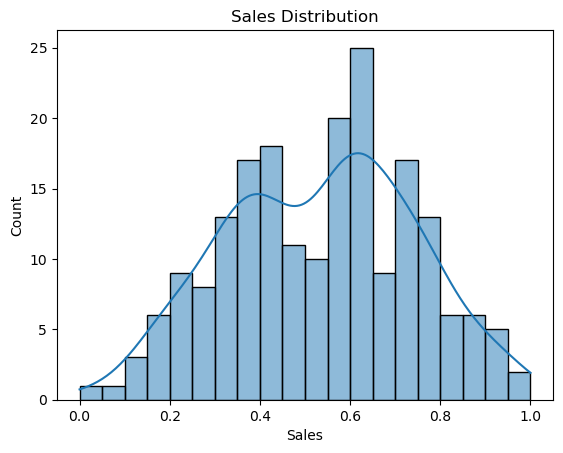

In [64]:
sns.histplot(dataset['Sales'], kde = True, bins = 20)
plt.title('Sales Distribution')
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

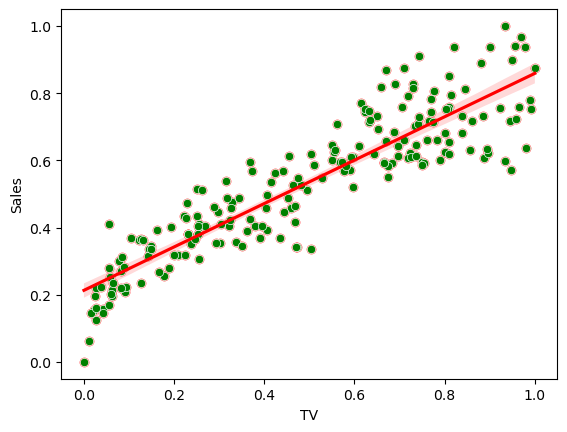

In [72]:
sns.regplot(x = 'TV', y = 'Sales' , data = dataset, color = 'red')
sns.scatterplot(x = 'TV', y = 'Sales' , data = dataset, color = 'green')

C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

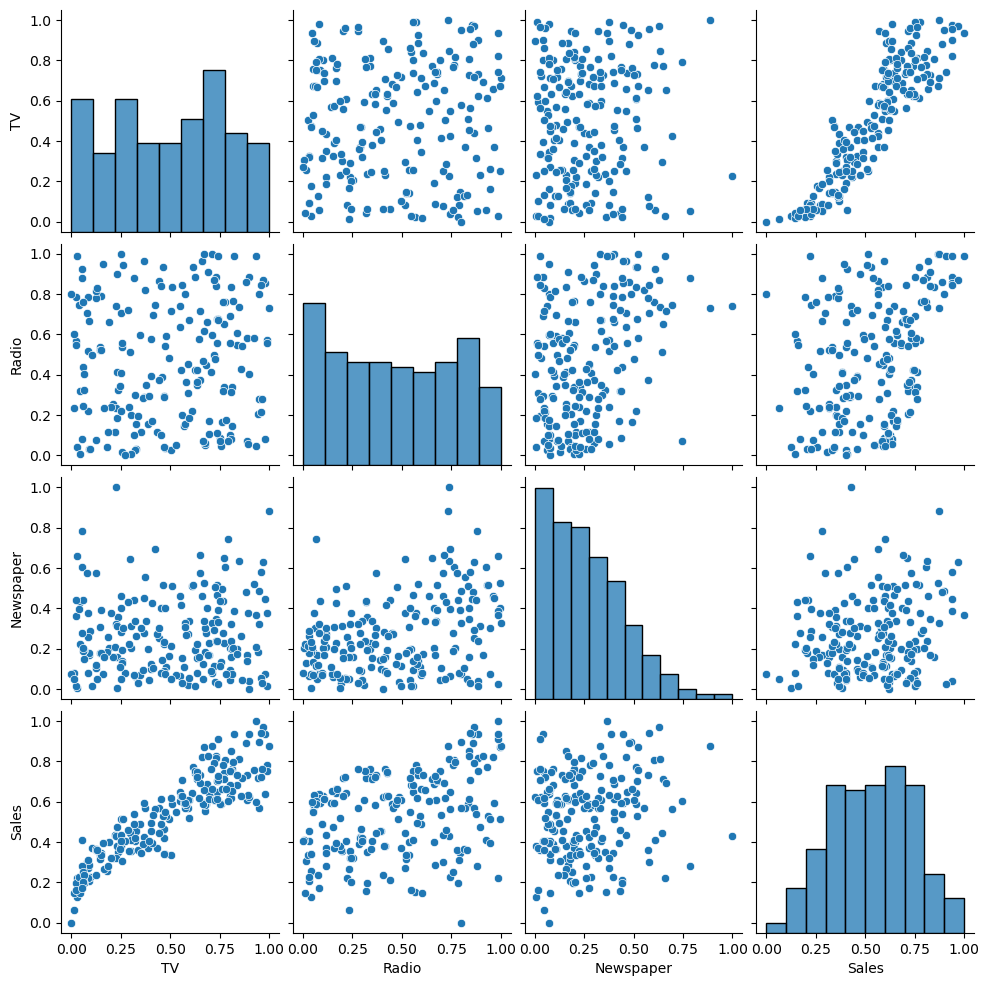

In [81]:
sns.pairplot(dataset)
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()sns.pairplot(dataset, hue)
dataset = pd.DataFrame(ms.fit_transform(dataset))
dataset.head(2)

,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457


In [18]:
dataset.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.266086,0.532697
std,0.290342,0.299331,0.191545,0.208027
min,0.000000,0.000000,0.000000,0.000000
25%,0.249155,0.201109,0.109499,0.370079
50%,0.504058,0.461694,0.223835,0.566929
75%,0.737656,0.736391,0.394019,0.687008
max,1.000000,1.000000,1.000000,1.000000


In [46]:
columns ={
    0:'TV',
    1:'Radio',
    2:'Newspaper',
    3:'Sales'
}

dataset.rename(columns = columns, inplace =True)

In [47]:
data = dataset.corr()

<Axes: >

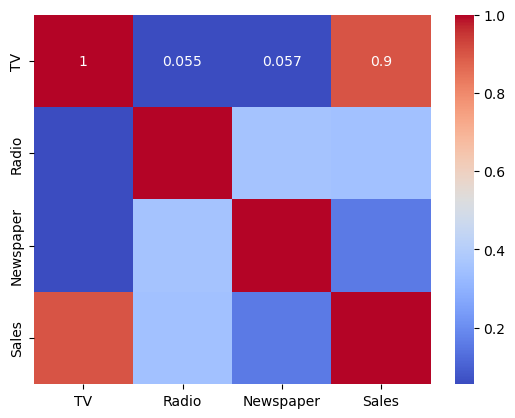

In [48]:
sns.heatmap(data, annot = True, cmap = 'coolwarm')

In [49]:
x = dataset[['TV','Radio']]
y = dataset['Sales']

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [150]:
x_train.head(2)

,TV,Radio
79,0.389922,0.155242
197,0.596212,0.187500


In [151]:
y_train.head(2)

79     0.370079
197    0.519685
Name: Sales, dtype: float64

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [153]:
models = {
    'lr' : LinearRegression(),
    'dtr' : DecisionTreeRegressor(),
    'rfr' : RandomForestRegressor(),
    'svr': SVR()
}

result = []

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    result.append({'model':model,'r2':r2,'mse':mse})

result = pd.DataFrame(result)
result

,model,r2,mse
0,LinearRegression(),0.907880,0.004412
1,DecisionTreeRegressor(),0.937648,0.002986
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.961614,0.001839
3,SVR(),0.921503,0.003760


In [182]:
 rfr = RandomForestRegressor(max_depth = 10,n_estimators = 100)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9588139511561105
0.0019726799769513243


In [188]:
x_train.head()

,TV,Radio
79,0.389922,0.155242
197,0.596212,0.187500
38,0.143389,0.538306
24,0.208319,0.254032
122,0.755157,0.048387


In [189]:
y_train.head()

79     0.370079
197    0.519685
38     0.334646
24     0.318898
122    0.590551
Name: Sales, dtype: float64

In [186]:
print(rfr.predict([[0.596212,0.187500]]))
print(y_train.iloc[3])

[0.21602362]
0.3188976377952755


C:\Users\amaan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
